In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "campania"

path_data = f'{path_root}/data'
path_img_root =  f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,15,Campania,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,15,Campania,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,15,Campania,2,0,2,1,3,3,3,...,0.0,0.0,0.0,1.0,0.00,66.67,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,15,Campania,2,0,2,2,4,1,1,...,0.0,203.0,0.0,1.0,0.00,50.00,0.49,0.00,0.00,33.33
4,2020-02-29T17:00:00,15,Campania,3,0,3,10,13,9,9,...,0.0,160.0,0.0,8.0,0.00,23.08,5.62,0.00,0.00,225.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,2021-03-09T17:00:00,15,Campania,1444,144,1588,89645,91233,1326,2709,...,45.0,23591.0,14002.0,1311.0,9.07,1.74,11.48,19.35,-2.70,1.47
379,2021-03-10T17:00:00,15,Campania,1471,143,1614,90813,92427,1194,3034,...,26.0,25867.0,15419.0,1168.0,8.86,1.75,11.73,19.68,-0.69,1.31
380,2021-03-11T17:00:00,15,Campania,1492,156,1648,92059,93707,1280,2981,...,27.0,27465.0,17453.0,1246.0,9.47,1.76,10.85,17.08,9.09,1.38
381,2021-03-12T17:00:00,15,Campania,1502,149,1651,93253,94904,1197,2644,...,29.0,22066.0,11264.0,1194.0,9.02,1.74,11.98,23.47,-4.49,1.28


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 13, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 2940
Nuovi tamponi: 27263.0
Percentuale nuovi positivi/nuovi tamponi: 10.8 %
Nuovi guariti: 1689.0
Nuovi deceduti: 23.0
Variazione positivi ricoverati con sintomi: 45.0
Variazione positivi in terapia intensiva: 1.0
Variazione positivi in isolamento dimiciliare: 1182.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 13, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-12T17:00:00,15,Campania,1414,109,1523,71066,72589,-2128,662,...,44.0,8747.0,4416.0,-2142.0,7.16,2.10,7.57,14.99,0.00,-2.85
1,2021-01-13T17:00:00,15,Campania,1405,106,1511,70749,72260,-329,1098,...,48.0,14742.0,9659.0,-317.0,7.02,2.09,7.45,11.37,-2.75,-0.45
2,2021-01-14T17:00:00,15,Campania,1365,104,1469,71284,72753,493,1294,...,41.0,13728.0,8726.0,535.0,7.08,2.02,9.43,14.83,-1.89,0.68
3,2021-01-15T17:00:00,15,Campania,1401,93,1494,71439,72933,180,1150,...,37.0,13929.0,9004.0,155.0,6.22,2.05,8.26,12.77,-10.58,0.25
4,2021-01-16T17:00:00,15,Campania,1432,97,1529,72537,74066,1133,1132,...,0.0,14611.0,11526.0,1098.0,6.34,2.06,7.75,9.82,4.30,1.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-03-09T17:00:00,15,Campania,1444,144,1588,89645,91233,1326,2709,...,45.0,23591.0,14002.0,1311.0,9.07,1.74,11.48,19.35,-2.70,1.47
57,2021-03-10T17:00:00,15,Campania,1471,143,1614,90813,92427,1194,3034,...,26.0,25867.0,15419.0,1168.0,8.86,1.75,11.73,19.68,-0.69,1.31
58,2021-03-11T17:00:00,15,Campania,1492,156,1648,92059,93707,1280,2981,...,27.0,27465.0,17453.0,1246.0,9.47,1.76,10.85,17.08,9.09,1.38
59,2021-03-12T17:00:00,15,Campania,1502,149,1651,93253,94904,1197,2644,...,29.0,22066.0,11264.0,1194.0,9.02,1.74,11.98,23.47,-4.49,1.28


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

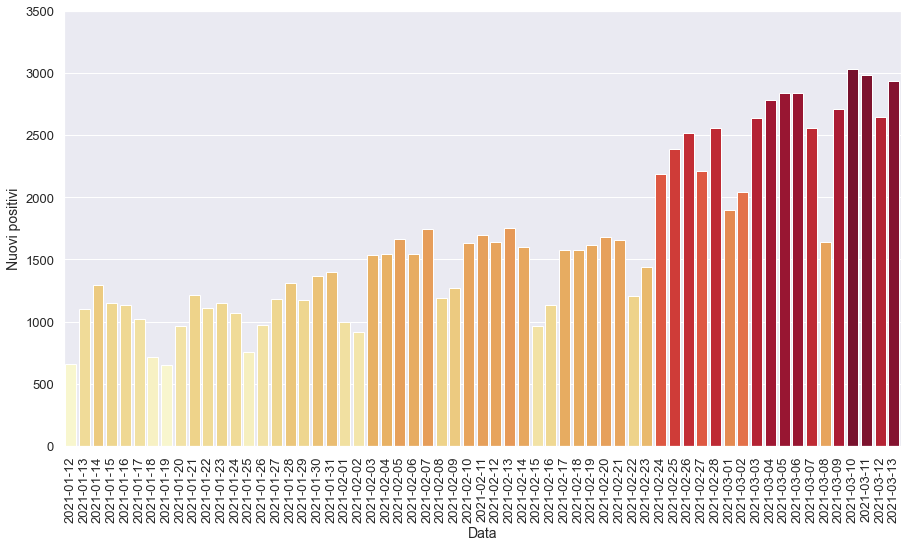

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

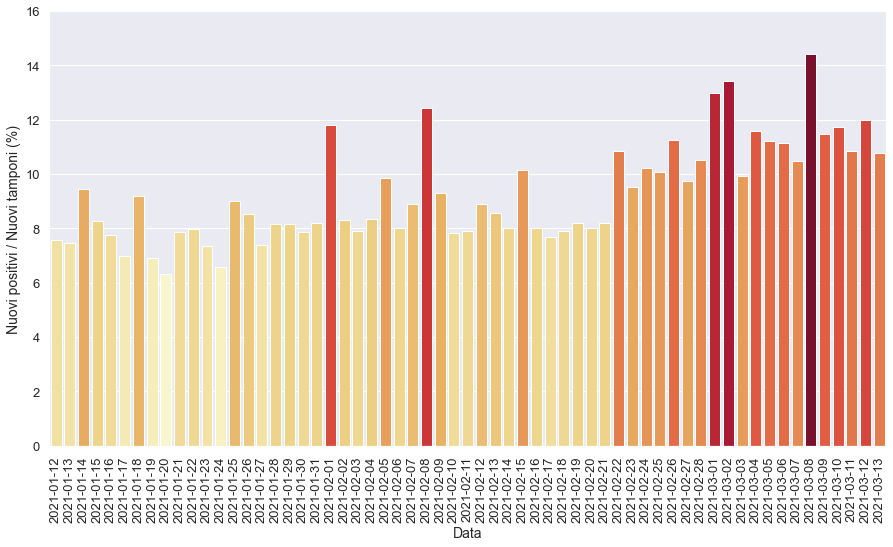

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

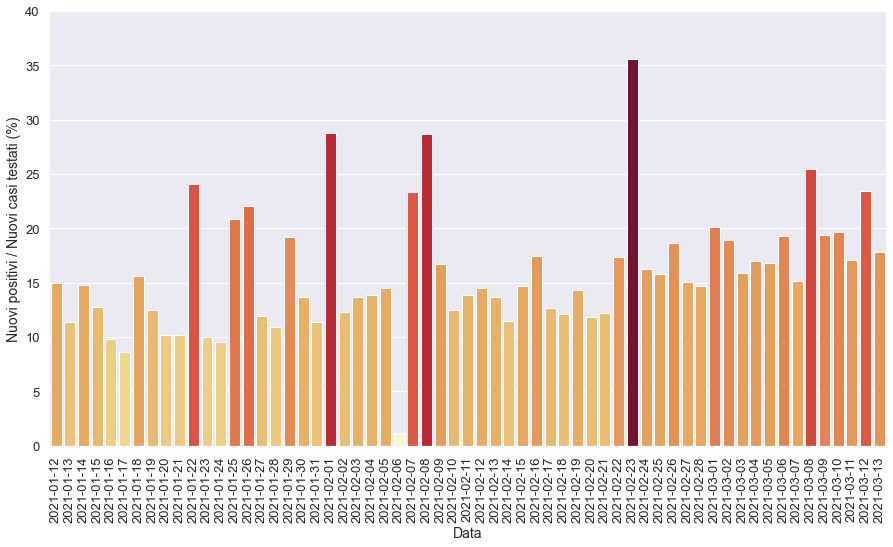

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

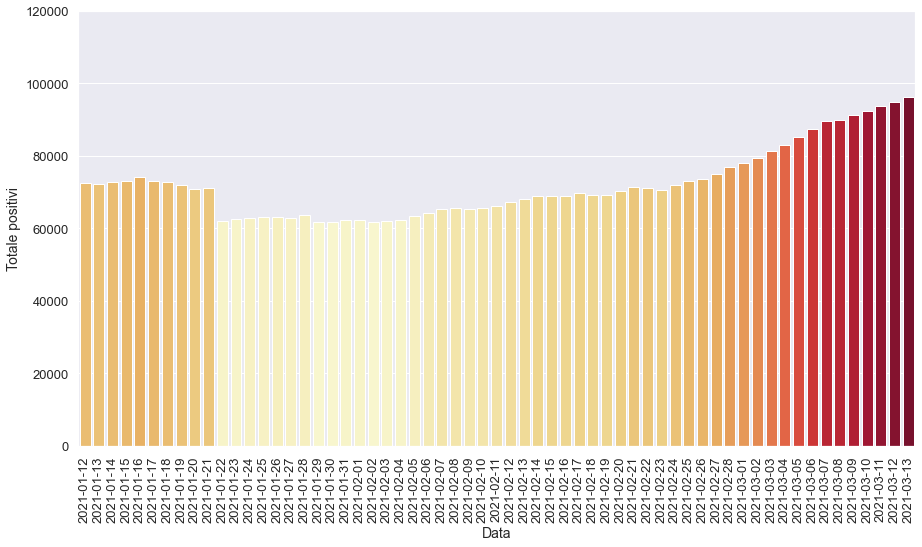

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

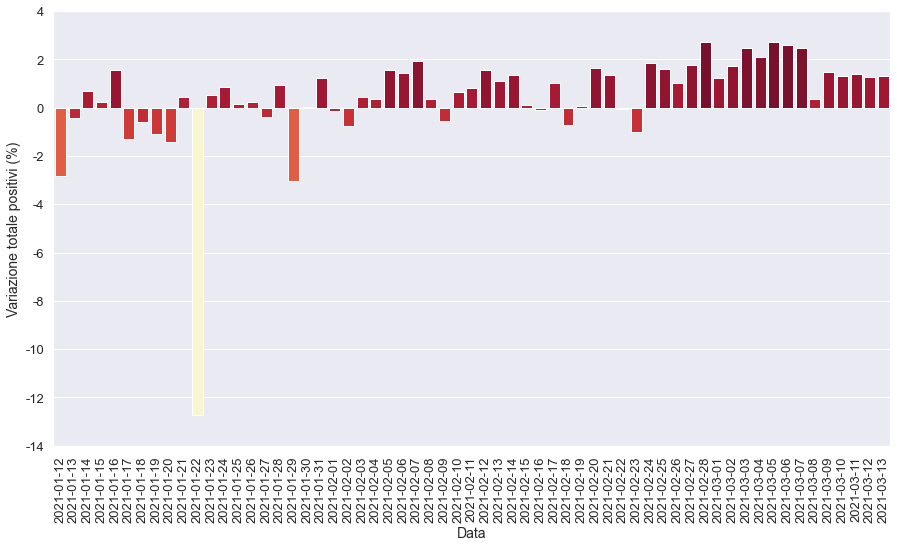

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

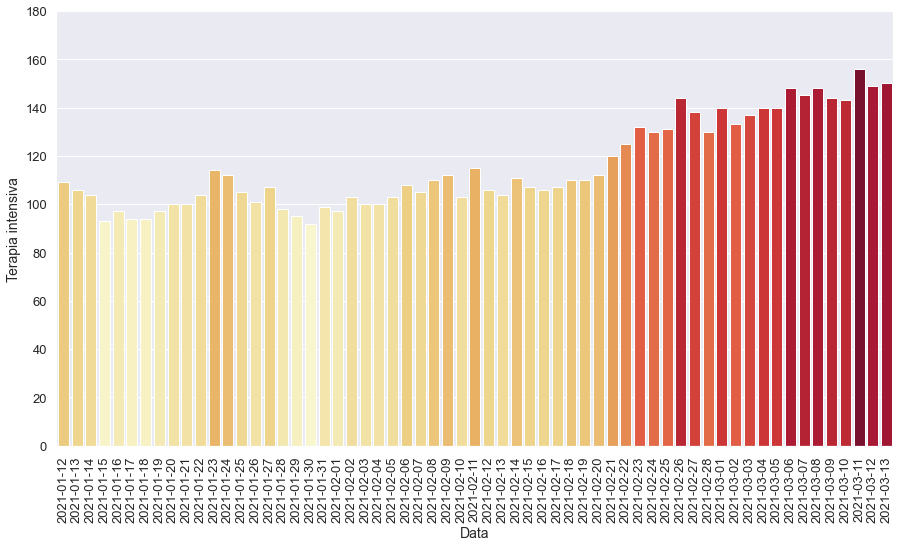

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

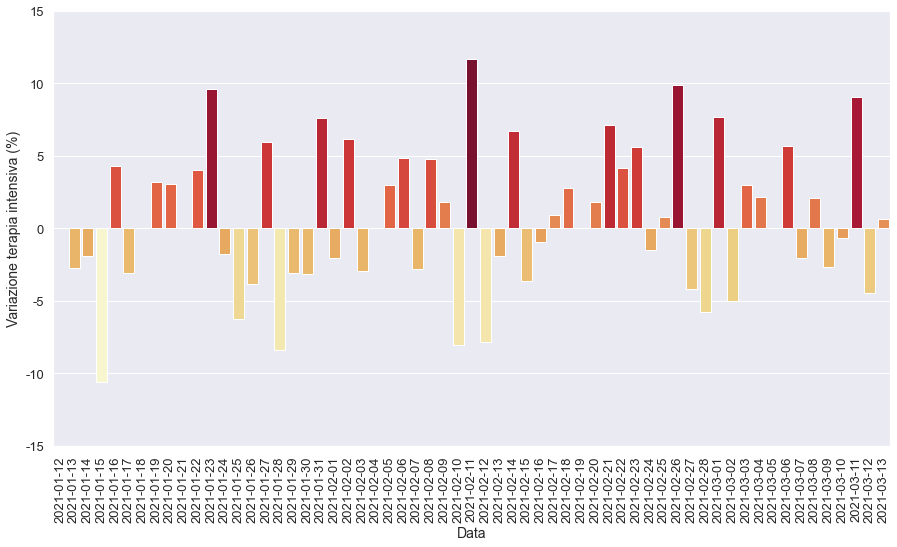

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

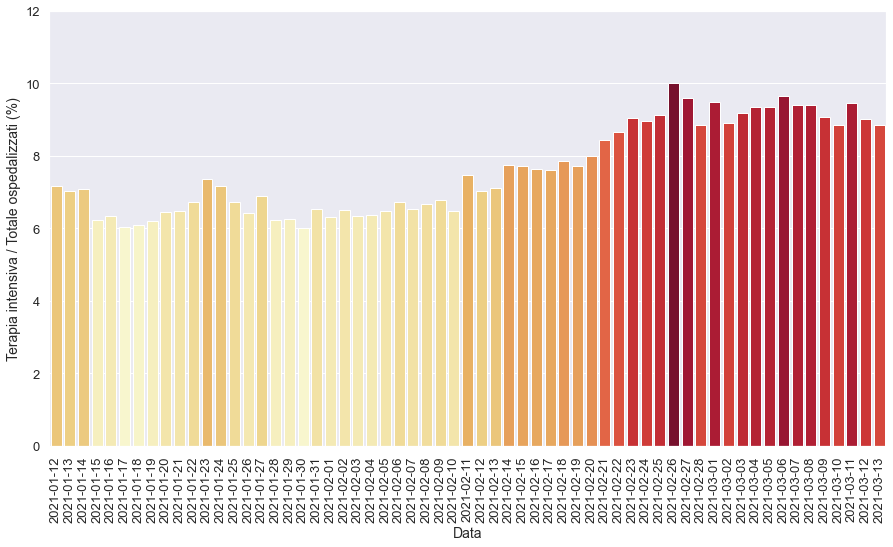

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

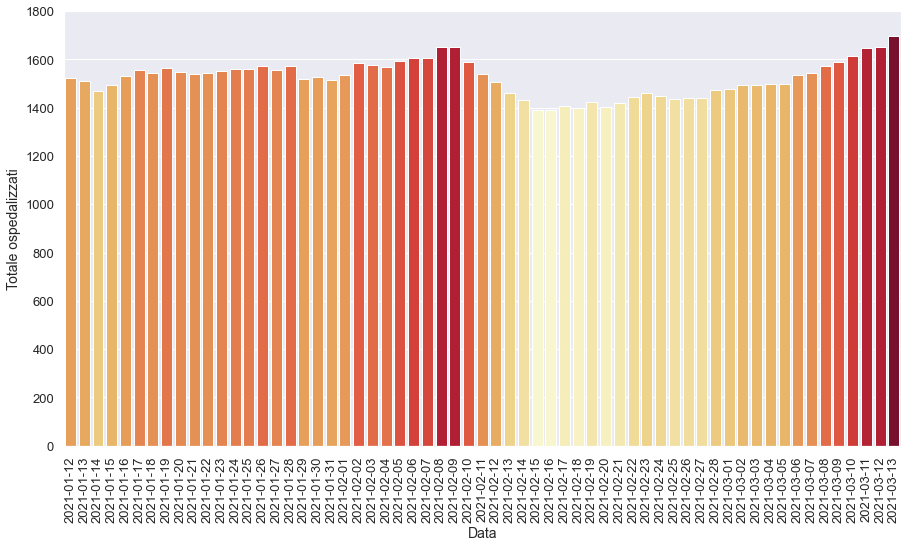

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

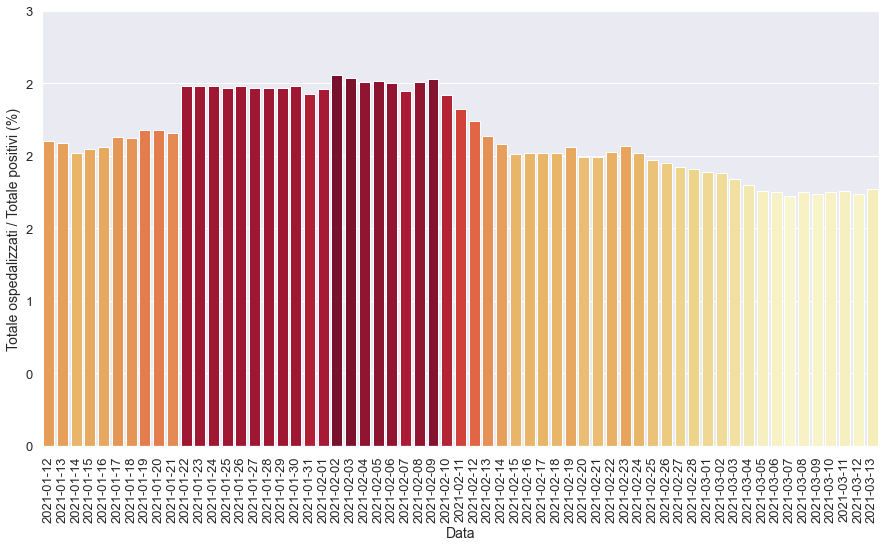

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

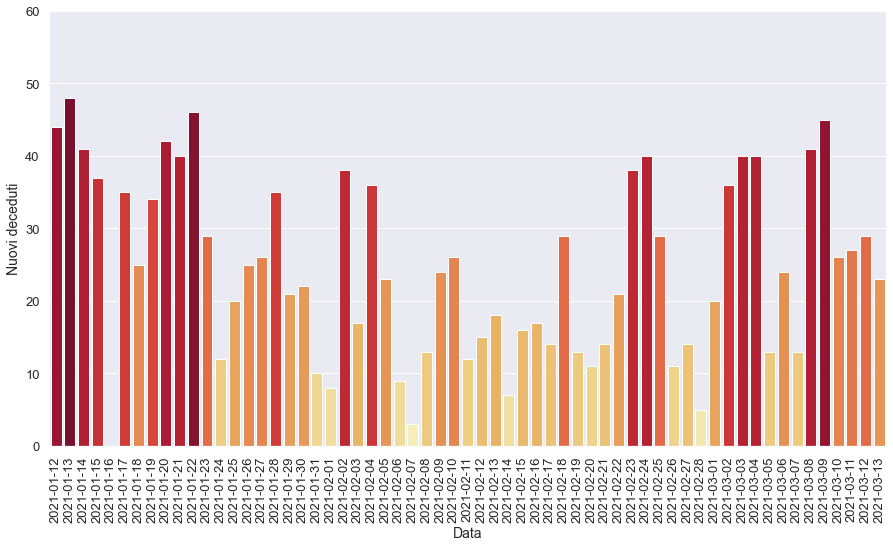

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

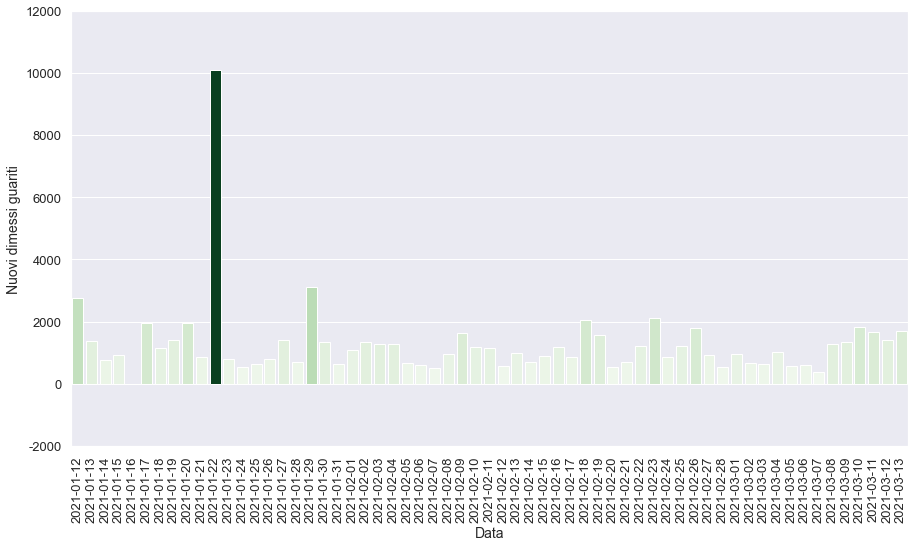

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-11T17:00:00,15,Campania,1425,115,1540,64753,66293,542,1694,...,12.0,21458.0,12214.0,591.0,7.47,2.32,7.89,13.87,11.65,0.82
1,2021-02-12T17:00:00,15,Campania,1399,106,1505,65827,67332,1039,1637,...,15.0,18393.0,11241.0,1074.0,7.04,2.24,8.90,14.56,-7.83,1.57
2,2021-02-13T17:00:00,15,Campania,1356,104,1460,66624,68084,752,1751,...,18.0,20413.0,12802.0,797.0,7.12,2.14,8.58,13.68,-1.89,1.12
3,2021-02-14T17:00:00,15,Campania,1322,111,1433,67561,68994,910,1603,...,7.0,19987.0,14001.0,937.0,7.75,2.08,8.02,11.45,6.73,1.34
4,2021-02-15T17:00:00,15,Campania,1281,107,1388,67668,69056,62,966,...,16.0,9509.0,6562.0,107.0,7.71,2.01,10.16,14.72,-3.60,0.09
5,2021-02-16T17:00:00,15,Campania,1284,106,1390,67590,68980,-76,1135,...,17.0,14156.0,6498.0,-78.0,7.63,2.02,8.02,17.47,-0.93,-0.11
6,2021-02-17T17:00:00,15,Campania,1301,107,1408,68271,69679,699,1575,...,14.0,20469.0,12452.0,681.0,7.60,2.02,7.69,12.65,0.94,1.01
7,2021-02-18T17:00:00,15,Campania,1290,110,1400,67782,69182,-497,1573,...,29.0,19886.0,13007.0,-489.0,7.86,2.02,7.91,12.09,2.80,-0.71
8,2021-02-19T17:00:00,15,Campania,1313,110,1423,67806,69229,47,1616,...,13.0,19708.0,11291.0,24.0,7.73,2.06,8.20,14.31,0.00,0.07
9,2021-02-20T17:00:00,15,Campania,1289,112,1401,68951,70352,1123,1677,...,11.0,20893.0,14181.0,1145.0,7.99,1.99,8.03,11.83,1.82,1.62


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

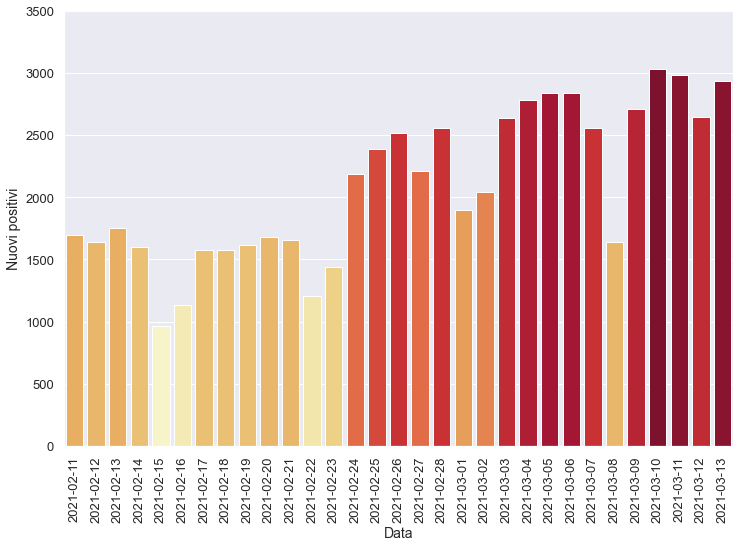

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

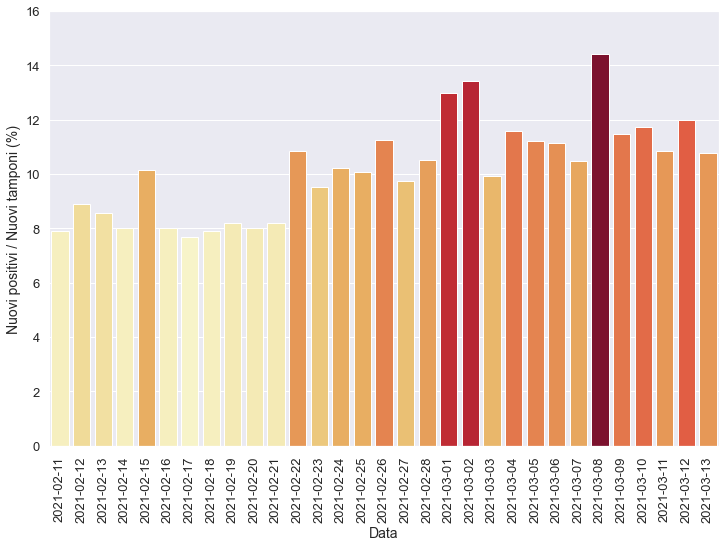

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

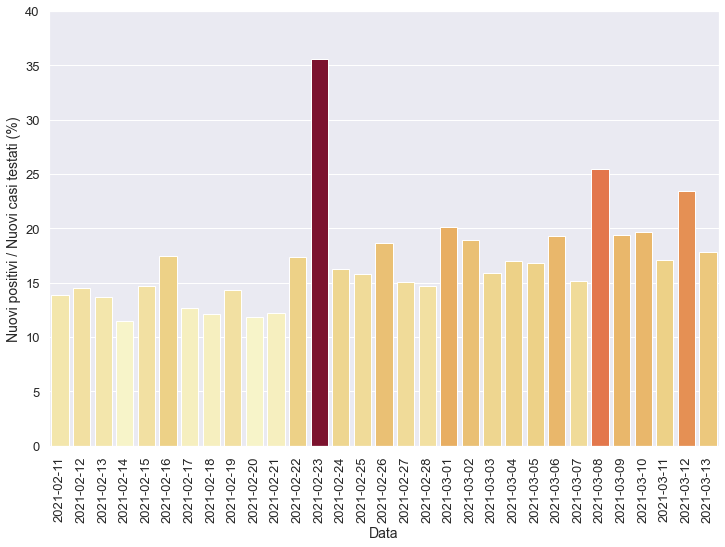

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

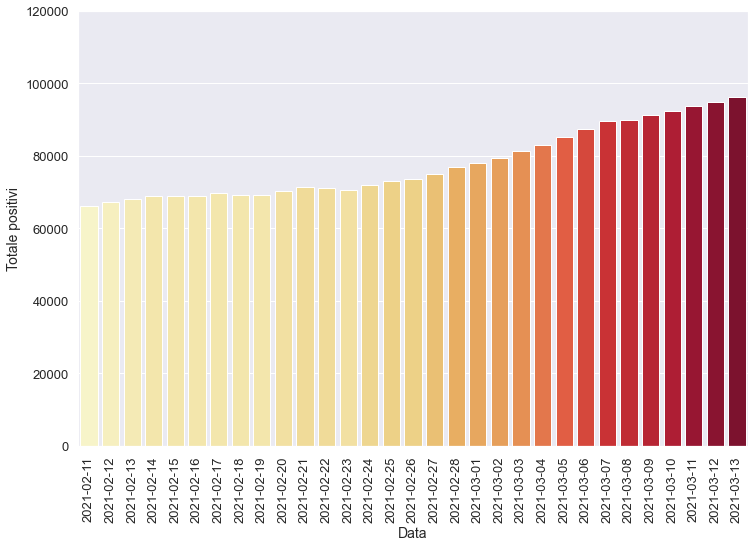

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

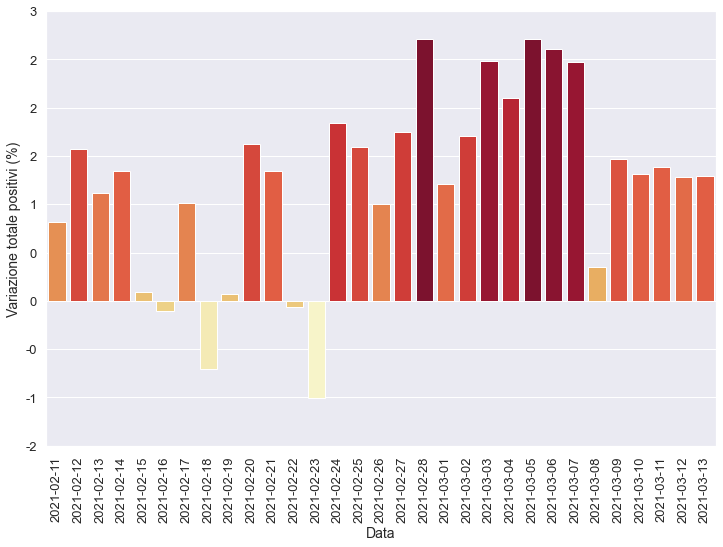

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

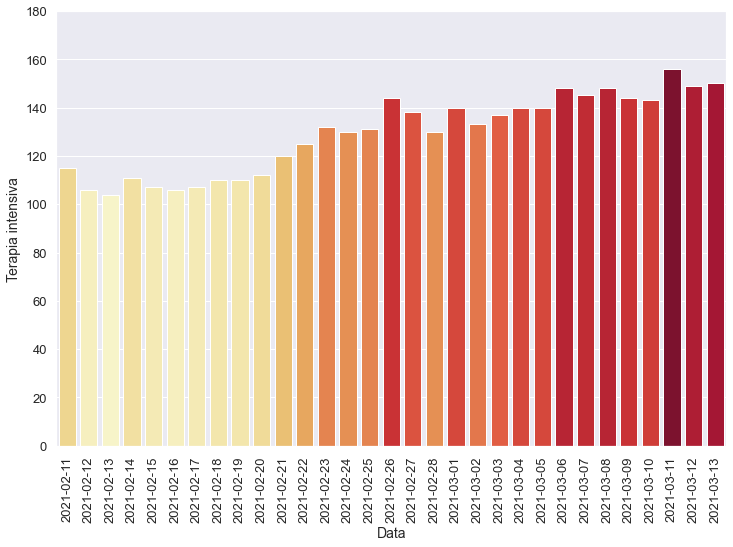

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

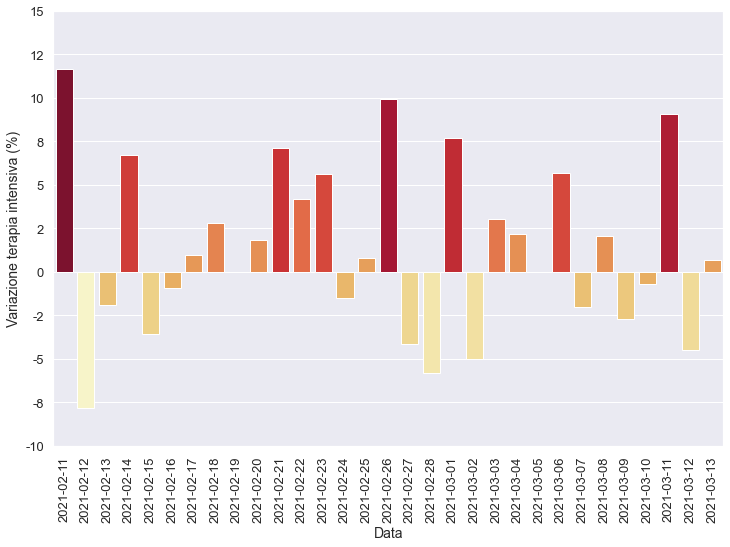

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

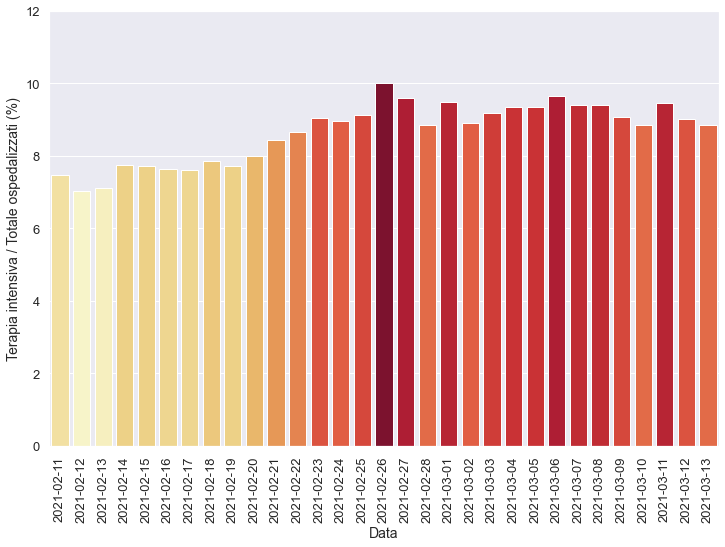

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

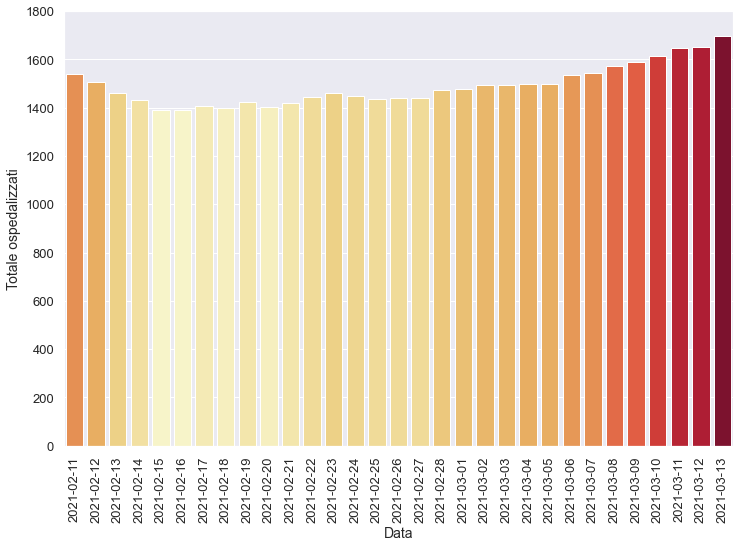

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

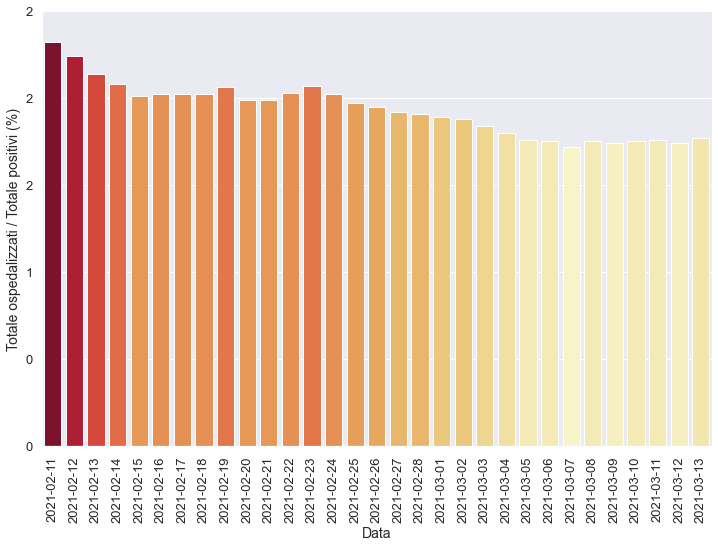

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

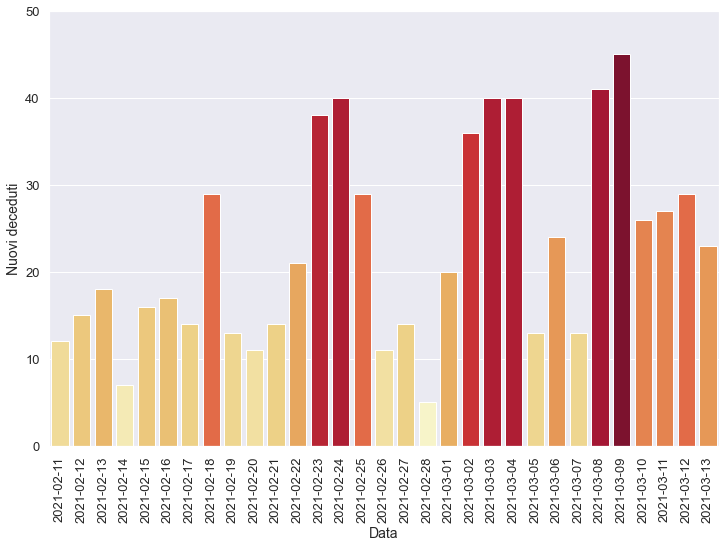

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

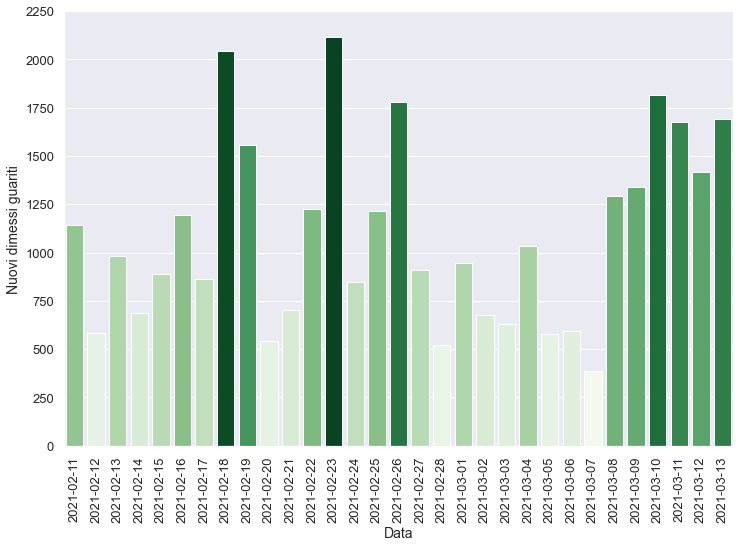

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-03-06T17:00:00,15,Campania,1385,148,1533,85900,87433,2223,2843,...,24.0,25527.0,14711.0,2188.0,9.65,1.75,11.14,19.33,5.71,2.61
1,2021-03-07T17:00:00,15,Campania,1396,145,1541,88054,89595,2162,2560,...,13.0,24393.0,16859.0,2154.0,9.41,1.72,10.49,15.18,-2.03,2.47
2,2021-03-08T17:00:00,15,Campania,1425,148,1573,88334,89907,312,1644,...,41.0,11398.0,6452.0,280.0,9.41,1.75,14.42,25.48,2.07,0.35
3,2021-03-09T17:00:00,15,Campania,1444,144,1588,89645,91233,1326,2709,...,45.0,23591.0,14002.0,1311.0,9.07,1.74,11.48,19.35,-2.70,1.47
4,2021-03-10T17:00:00,15,Campania,1471,143,1614,90813,92427,1194,3034,...,26.0,25867.0,15419.0,1168.0,8.86,1.75,11.73,19.68,-0.69,1.31
5,2021-03-11T17:00:00,15,Campania,1492,156,1648,92059,93707,1280,2981,...,27.0,27465.0,17453.0,1246.0,9.47,1.76,10.85,17.08,9.09,1.38
6,2021-03-12T17:00:00,15,Campania,1502,149,1651,93253,94904,1197,2644,...,29.0,22066.0,11264.0,1194.0,9.02,1.74,11.98,23.47,-4.49,1.28
7,2021-03-13T17:00:00,15,Campania,1547,150,1697,94435,96132,1228,2940,...,23.0,27263.0,16529.0,1182.0,8.84,1.77,10.78,17.79,0.67,1.29


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

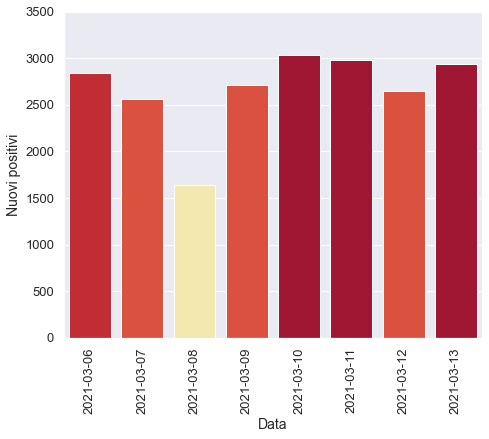

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

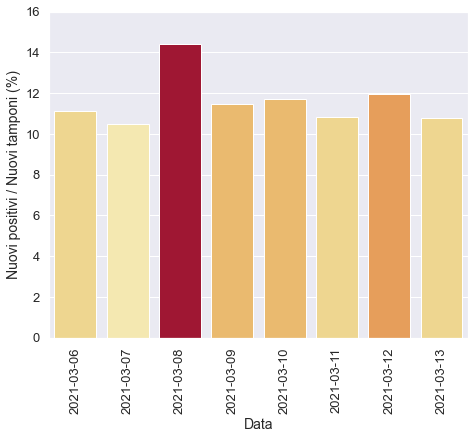

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

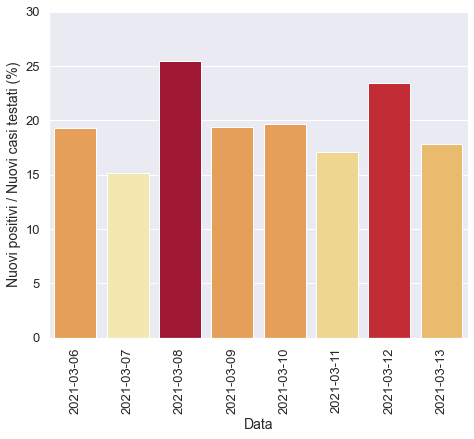

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

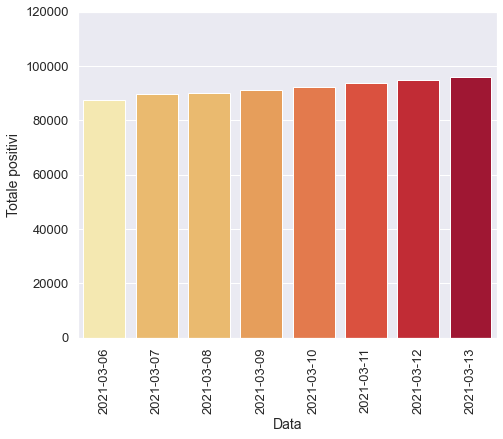

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

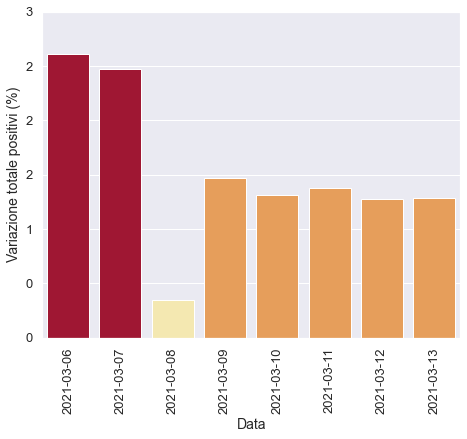

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

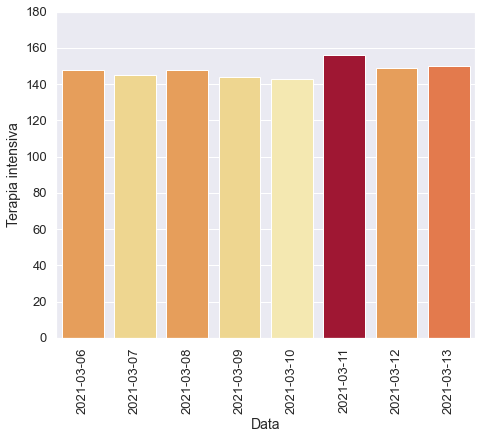

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

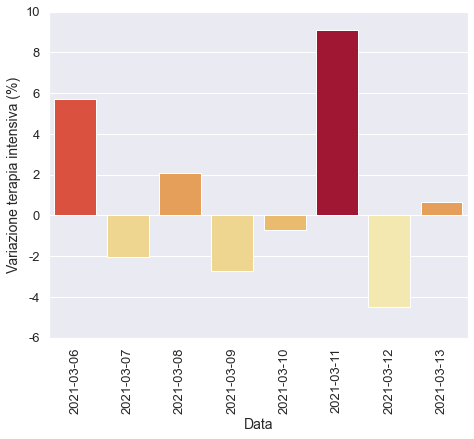

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

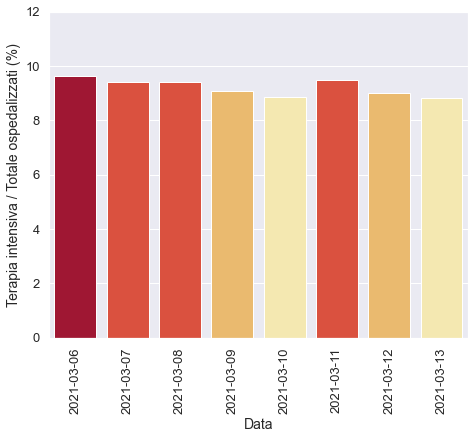

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

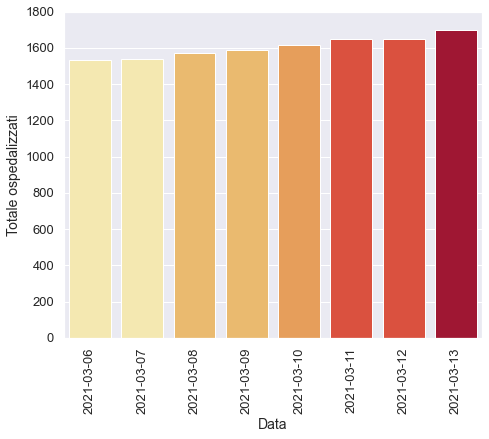

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

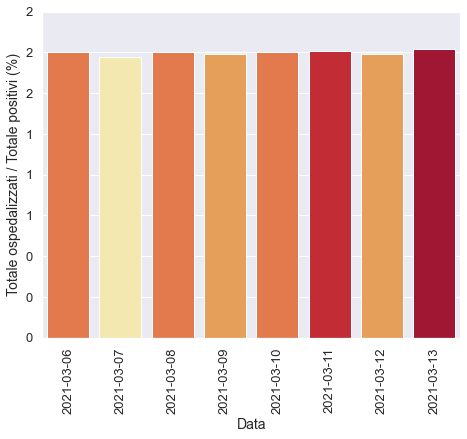

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

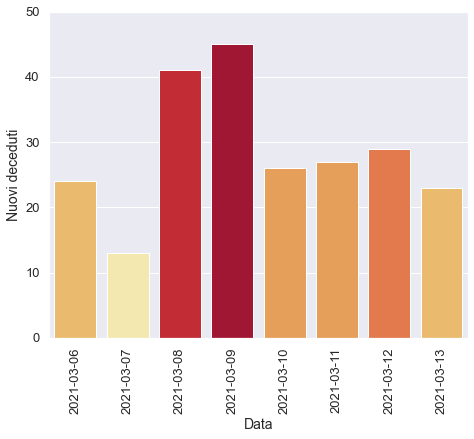

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

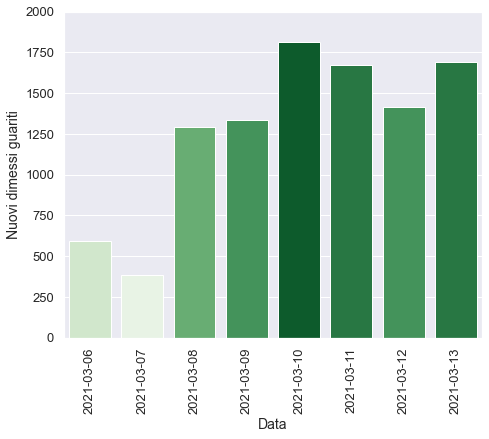

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)